<a href="https://colab.research.google.com/github/Sugam1530/Productionization-of-ML-Systems/blob/main/Productionization_of_ML_Systems_Regression(Specialization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Sugam1530/30daysofFlutter/blob/master/Productionization_of_ML_Systems(Specialization).ipynb

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import pickle
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, request, jsonify
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/travel_capstone/flights.csv'

In [ ]:
flights_df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset Rows & Columns count

In [ ]:
flights_df.shape

(271888, 10)

### Dataset Information

In [ ]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


#### Duplicate Values

In [ ]:
flights_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

### What did you know about your dataset?

These 3 datasets are perfect datasets to do ML operations. There is not null values or not even any duplication of values.

## ***2. Understanding Your Variables***

In [ ]:
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [ ]:
flights_df.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


### Check Unique Values for each variable.

In [ ]:
flights_df.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64

In [ ]:
categorical_cols = ['from', 'to', 'flightType', 'agency']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_categorical_features = encoder.fit_transform(flights_df[categorical_cols])

encoded_df = pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.reset_index(drop=True, inplace=True)

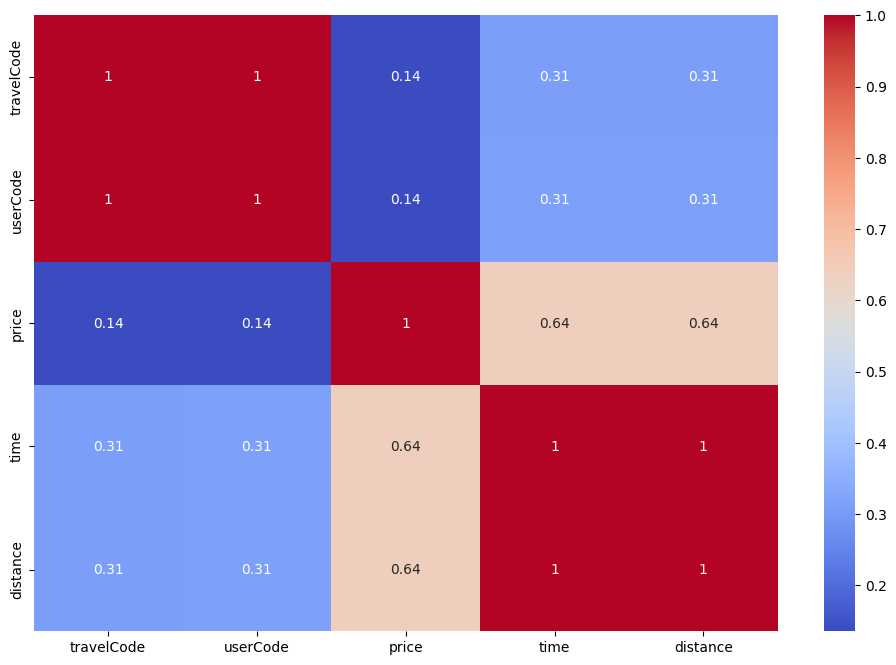

In [ ]:
numeric_cols = flights_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix = numeric_cols.corr()
corr_with_target = corr_matrix['price'].abs().sort_values(ascending=False)
print(corr_with_target)

threshold = 0.3
selected_features = corr_with_target[corr_with_target > threshold].index
print("Selected features:", selected_features)

price         1.000000
distance      0.641915
time          0.641800
userCode      0.137282
travelCode    0.135749
Name: price, dtype: float64
Selected features: Index(['price', 'distance', 'time'], dtype='object')


In [ ]:
numeric_cols = ['distance', 'time', 'price']
numerical_df = flights_df[numeric_cols].reset_index(drop=True)

In [ ]:
new_flights_df = pd.concat([numerical_df, encoded_df], axis=1)

In [ ]:
new_flights_df.head()

,travelCode,userCode,price,time,distance,from_Aracaju (SE),from_Brasilia (DF),from_Campo Grande (MS),from_Florianopolis (SC),from_Natal (RN),...,to_Recife (PE),to_Rio de Janeiro (RJ),to_Salvador (BH),to_Sao Paulo (SP),flightType_economic,flightType_firstClass,flightType_premium,agency_CloudFy,agency_FlyingDrops,agency_Rainbow
0,0,0,1434.38,1.76,676.53,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,1292.29,1.76,676.53,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,1487.52,1.66,637.56,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0,1127.36,1.66,637.56,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2,0,1684.05,2.16,830.86,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X = new_flights_df.drop('price', axis=1)
y = new_flights_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

Mean Squared Error: 10640.311874028483
R-squared: 0.919250389537233
RMSE: 103.15188739925452


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest Regression RMSE: {rmse_rf}')

Random Forest Regression RMSE: 4.886908402256591e-12


In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f'Gradient Boosting Regression RMSE: {rmse_gb}')

Gradient Boosting Regression RMSE: 39.22277276682182


# **It is clearly visible that Random Forest Regressor Model has performed exceptionally well. So, I am making pkl file of Random Forest Model.**

In [ ]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
type(rf_model)

sklearn.ensemble._forest.RandomForestRegressor

In [ ]:
import os

for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        if filename == 'random_forest_model.pkl':
            print(os.path.join(dirname, filename))


/content/random_forest_model.pkl


In [ ]:
from google.colab import files

files.download('/content/random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_file_path = '/content/random_forest_model.pkl'

# Load the model from the file
with open(model_file_path, 'rb') as model_file:
    loaded_decision_tree_reg = joblib.load(model_file)

In [ ]:
type(loaded_decision_tree_reg)

sklearn.ensemble._forest.RandomForestRegressor

In [ ]:
app = Flask(__name__)

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Convert JSON data to DataFrame
    input_df = pd.DataFrame([data])

    # Make predictions
    prediction = model.predict(input_df.values)

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***